In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import matplotlib.pyplot as plt


from matplotlib.pyplot import cm

In [2]:
df = pd.read_csv('df_master91.csv')

In [28]:
df

,Unnamed: 0,zipcode,median_income,population,county,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]"
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]"
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]"
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]"
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0
5,5,10006,111220.0000,972,New York County,3700.0,45.0,2.0,30.0,"(6, 72]"
6,6,10007,145458.7823,3520,New York County,6325.0,141.0,9.0,26.0,"(6, 72]"
7,7,10009,56615.2777,56975,New York County,3350.0,311.0,13.0,4.0,"(0, 6]"
8,8,10010,93702.0061,27322,New York County,3500.0,259.0,0.0,0.0,0
9,9,10011,92359.4888,45899,New York County,3695.0,455.0,1.0,72.0,"(6, 72]"


In [48]:
regression_0 = LinearRegression()
regression_1 = LinearRegression()


In [49]:
subway_0 = df[df["subway_dummy"]==0]
subway_1 = df[df["subway_dummy"]==1]

In [50]:
rent_0 = subway_0["median_rent"].values.reshape(-1, 1)
rent_1 = subway_1["median_rent"].values.reshape(-1, 1)

In [51]:
regression_0.fit(rent_0, subway_0["median_income"])
regression_1.fit(rent_1, subway_1["median_income"])

pred_0 = regression_0.predict(rent_0)
pred_1 = regression_1.predict(rent_1)

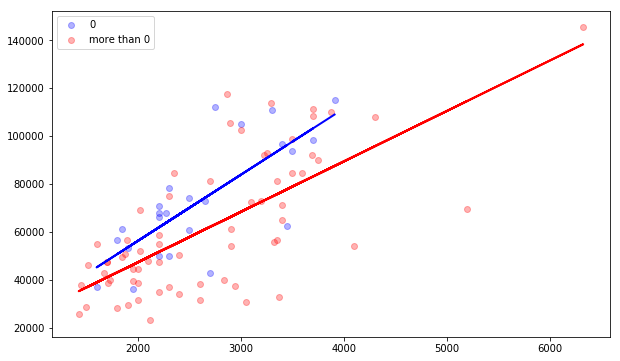

In [52]:
plt.figure(figsize=(10,6))

plt.scatter(rent_0, subway_0["median_income"],  color='blue', alpha = 0.3, label = '0')
plt.scatter(rent_1, subway_1["median_income"],  color='red', alpha = 0.3, label ='more than 0')
#plt.scatter(rent_2, subway_2["median_income"],  color='orange', alpha = 0.3, label = 'more than 6')

plt.plot(rent_0, pred_0,  color='blue', linewidth=2)
plt.plot(rent_1, pred_1,  color='red', linewidth=2)
#plt.plot(rent_2, pred_2,  color='orange', linewidth=2)

plt.ylabel("")
plt.xlabel("")
plt.legend();

In [71]:
def category_plot(data, category_column, x_column, y_column):
    plt.figure(figsize=(10,6))
    cat_names=data[category_column].unique()
    n_cats=len(cat_names)
    color=iter(cm.rainbow(np.linspace(0,1,n_cats)))
    for cat in cat_names:        
        c=next(color)
        regression = LinearRegression()
        cat_data = data[data[category_column]==cat]
        cat_x = cat_data[x_column].values.reshape(-1, 1)
        regression.fit(cat_x, cat_data[y_column])
        pred = regression.predict(cat_x)
        plt.scatter(cat_x, cat_data[y_column],  color=c, alpha = 0.3, label = cat)
        plt.plot(cat_x, pred,  color=c, linewidth=2)
    plt.ylabel("")
    plt.xlabel("")
    plt.legend();

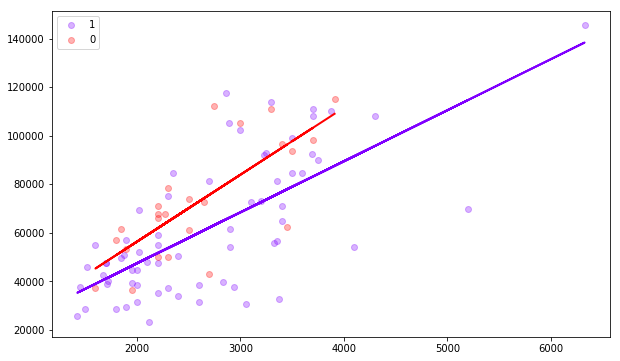

In [72]:
category_plot(df, 'subway_dummy', 'median_rent', 'median_income')

In [46]:
df['subway_dummy'] = np.where(df['num_subway_entrances']!=0, 1, 0)

In [47]:
df

,Unnamed: 0,zipcode,median_income,population,county,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket,subway_dummy
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]",1
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]",1
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]",1
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]",1
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0,0
5,5,10006,111220.0000,972,New York County,3700.0,45.0,2.0,30.0,"(6, 72]",1
6,6,10007,145458.7823,3520,New York County,6325.0,141.0,9.0,26.0,"(6, 72]",1
7,7,10009,56615.2777,56975,New York County,3350.0,311.0,13.0,4.0,"(0, 6]",1
8,8,10010,93702.0061,27322,New York County,3500.0,259.0,0.0,0.0,0,0
9,9,10011,92359.4888,45899,New York County,3695.0,455.0,1.0,72.0,"(6, 72]",1


In [55]:
len(df.county.unique())

5

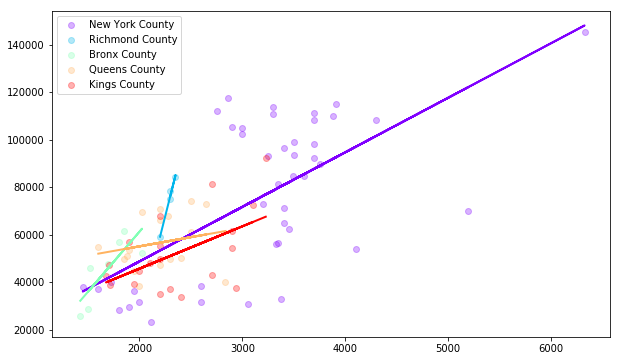

In [73]:
category_plot(df, 'county', 'median_rent', 'median_income')

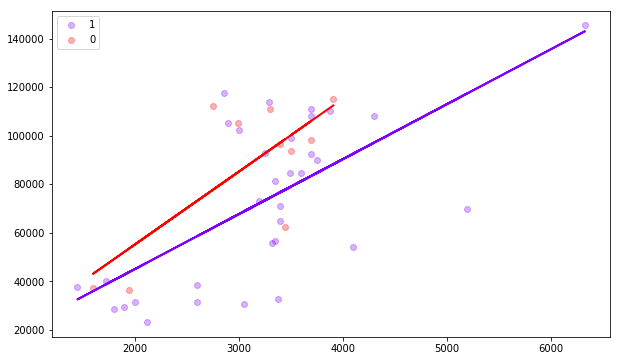

In [74]:
category_plot(df[df['county']=="New York County"], 'subway_dummy', 'median_rent', 'median_income')

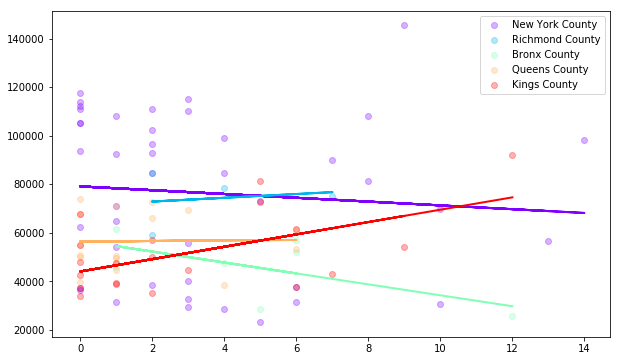

In [76]:
category_plot(df, 'county', 'recycling_bin_count', 'median_income')